In [1]:
import pandas as pd
import math

In [113]:
hc = pd.read_csv('HC.txt', sep=' ', index_col=['G', 'N', 'M'])
ps = pd.read_csv('PS.txt', sep=' ', index_col=['G', 'N', 'M'])
sd = pd.read_csv('SD.txt', sep=' ', index_col=['G', 'N', 'M'])
sn = pd.read_csv('SN.txt', sep=' ', index_col=['G', 'N', 'M'])
snp = pd.read_csv('SN+.txt', sep=' ', index_col=['G', 'N', 'M'])

In [114]:
data = pd.DataFrame(index=hc.index)
data['HC'] = hc['OF']
data['PS'] = ps['OF']
data['SD'] = sd['OF']
data['SN+'] = snp['OF']
data['SN'] = sn['OF']
data['best'] = data.min(axis=1)

In [115]:
count = data.copy()
count['HC'] = data['HC'] == data['best']
count['PS'] = data['PS'] == data['best']
count['SD'] = data['SD'] == data['best']
count['SN+'] = data['SN+'] == data['best']
count['SN'] = data['SN'] == data['best']

In [190]:
count_result = count.groupby(level=[0,1,2]).sum()[['SN', 'SN+', 'SD', 'PS', 'HC']] / 50 * 100
count_result = count_result.astype(int)
print(count_result.unstack(0).swaplevel(0,1,axis=1).sort_index(axis=1).to_latex(bold_rows=True, formatt))
# print(count_result[count_result.index.get_level_values(0) == 1].reset_index(level=0, drop=True).to_latex(bold_rows=True))
# print(count_result[count_result.index.get_level_values(0) == 2].reset_index(level=0, drop=True).to_latex(bold_rows=True))

\begin{tabular}{llrrrrrrrrrr}
\toprule
    & \textbf{G} & \multicolumn{5}{l}{1} & \multicolumn{5}{l}{2} \\
    & {} &  HC &  PS &  SD & SN & SN+ &  HC &  PS &  SD & SN & SN+ \\
\textbf{N} & \textbf{M} &     &     &     &    &     &     &     &     &    &     \\
\midrule
\textbf{20 } & \textbf{12 } &  64 &  38 &  40 &  2 &  10 &  46 &  50 &  18 &  0 &  10 \\
    & \textbf{20 } &  52 &  26 &  46 &  0 &  12 &  62 &  32 &  26 &  0 &   2 \\
    & \textbf{28 } &  52 &  36 &  32 &  0 &   2 &  64 &  24 &  46 &  0 &   0 \\
\textbf{40 } & \textbf{24 } &  76 &   6 &  50 &  0 &   0 &  70 &  16 &  40 &  0 &   2 \\
    & \textbf{40 } &  60 &  12 &  42 &  0 &   2 &  66 &  18 &  40 &  0 &   0 \\
    & \textbf{56 } &  74 &   6 &  42 &  0 &   0 &  62 &  18 &  42 &  0 &   0 \\
\textbf{80 } & \textbf{48 } &  70 &   0 &  52 &  0 &   6 &  74 &   0 &  56 &  0 &   2 \\
    & \textbf{80 } &  64 &   2 &  50 &  0 &   0 &  74 &   0 &  46 &  0 &   4 \\
    & \textbf{112} &  64 &   0 &  52 &  0 &   0 &  57 &   2 & 

In [193]:
gap = data.copy()
gap['HC'] = (data['HC'] - data['best'])  / data['best'] * 100
gap['PS'] = (data['PS'] - data['best']) / data['best'] * 100
gap['SD'] = (data['SD'] - data['best']) / data['best'] * 100
gap['SN+'] = (data['SN+'] - data['best']) / data['best'] * 100
gap['SN'] = (data['SN'] - data['best']) / data['best'] * 100

idx = gap.index.unique()
gap_result = pd.DataFrame(index=idx)


for col in ['SN', 'SN+', 'SD', 'PS', 'HC']:
    df = gap[col].copy()    
    df = df.groupby(df.index, sort=False).agg(['mean', 'std'])
    df[col] = df['mean'].map('{:.1f}'.format) + "±" + (1.96*df['std']/math.sqrt(50)).map('{:.1f}'.format)
    gap_result[col] = df[col].values    
    
gap_result = gap_result.sort_index()
print(gap_result.unstack(0).swaplevel(0,1,axis=1).sort_index(axis=1).to_latex(bold_rows=True))

#print(gap_result[gap_result.index.get_level_values(0) == 1]
#print(gap_result[gap_result.index.get_level_values(0) == 2].reset_index(level=0, drop=True).to_latex(bold_r.reset_index(level=0, drop=True).to_latex(bold_rows=True))ows=True))

\begin{tabular}{llllllllllll}
\toprule
    & \textbf{G} & \multicolumn{5}{l}{1} & \multicolumn{5}{l}{2} \\
    & {} &       HC &       PS &       SD &       SN &      SN+ &       HC &       PS &       SD &       SN &      SN+ \\
\textbf{N} & \textbf{M} &          &          &          &          &          &          &          &          &          &          \\
\midrule
\textbf{20 } & \textbf{12 } &  0.5±0.3 &  0.7±0.3 &  0.8±0.3 &  3.7±0.6 &  2.2±0.6 &  0.4±0.2 &  0.4±0.2 &  0.8±0.3 &  3.9±0.6 &  2.2±0.5 \\
    & \textbf{20 } &  0.4±0.2 &  0.9±0.3 &  0.4±0.2 &  5.2±0.6 &  2.5±0.5 &  0.4±0.2 &  1.1±0.4 &  0.5±0.2 &  4.6±0.5 &  2.3±0.4 \\
    & \textbf{28 } &  0.4±0.2 &  0.8±0.3 &  0.4±0.2 &  5.1±0.6 &  2.4±0.5 &  0.1±0.1 &  0.7±0.2 &  0.2±0.1 &  5.0±0.5 &  2.3±0.4 \\
\textbf{40 } & \textbf{24 } &  0.0±0.0 &  1.2±0.3 &  0.1±0.1 &  2.5±0.3 &  1.7±0.3 &  0.1±0.1 &  1.0±0.3 &  0.2±0.1 &  2.6±0.3 &  1.6±0.3 \\
    & \textbf{40 } &  0.0±0.0 &  1.2±0.2 &  0.1±0.0 &  3.0±0.3 &  1.7±0.3 &  0.

In [3]:
lg = pd.read_csv('LG_G1.txt').set_index(['N', 'M', 'I']).sort_index()
lp = pd.read_csv('LP_PV_G1.txt').set_index(['N', 'M', 'I']).sort_index()
mip = pd.read_csv('MIP_PV_G1.txt').set_index(['N', 'M', 'I']).sort_index()

lg.to_csv('lg.csv')
lp.to_csv('lp.csv')
mip.to_csv('mip.csv')

In [3]:
final = pd.concat([lg[['LB', 'UB']], lp['LB'], mip[['LB', 'UB']]], axis=1)
final.columns = ['Lag LB', 'Lag UB', 'LP LB', 'MIP LB', 'MIP UB']
final['UB*'] = final[['Lag UB', 'MIP UB']].min(axis=1)



final['Lag gap'] = (final['UB*'] - final['Lag LB'])/final['UB*']
final['LP gap'] = (final['UB*'] - final['LP LB'])/final['UB*']
final['MIP gap'] = (final['UB*'] - final['MIP LB'])/final['UB*']

final = final[['LP gap', 'MIP gap', 'Lag gap']]
final.round(4)
final.round(4).to_csv('results.csv')

In [28]:
count = 0
results = {}
with open('LG_LOG_G1.txt') as file:
    line = file.readline()
    while line:
        n,m,k = line.split(',')
        result = []
        line = file.readline()
        while line != 'end\n':
            i,j,l = line.strip().split(',')
            result.append({'i':int(i), 'j':int(j), 'lambda':float(l)})
            line = file.readline()
                
        results[(int(n),int(m),int(k))] = result
        line = file.readline()

In [26]:
data = pd.DataFrame(results[(20, 12, 0)])
data['i'] = data['i']  + 20
data.groupby('i').sum().sort_values(by='lambda')

NameError: name 'results' is not defined

In [16]:
lr = pd.read_csv('LR.txt', sep=' ', index_col=['G', 'N', 'M', 'I'])
lp = pd.read_csv('LP.txt', sep=' ', index_col=['G', 'N', 'M', 'I'])
ub = pd.read_csv('UB.txt', sep=' ', index_col=['G', 'N', 'M', 'I'])

In [45]:
data = pd.DataFrame(index=lr.index)
data['Lag gap'] = (ub['UB'] - lr['LB'])/ ub['UB'] * 100
data['Lin LB'] = (ub['UB'] - lp['LB'])/ ub['UB'] * 100

data = data.sort_index()[data.index.get_level_values(3) == 1].reset_index(level=3, drop=True).round(3)

print(data.unstack(0).swaplevel(0,1,axis=1).sort_index(axis=1).to_latex(bold_rows=True, na_rep="-"))

\begin{tabular}{llrrrr}
\toprule
    & \textbf{G} & \multicolumn{2}{l}{1} & \multicolumn{2}{l}{2} \\
    & {} & Lag gap &  Lin LB & Lag gap &  Lin LB \\
\textbf{N} & \textbf{M} &         &         &         &         \\
\midrule
\textbf{20 } & \textbf{12 } &  13.861 &   0.559 &  14.471 &   0.000 \\
    & \textbf{20 } &  20.321 &   4.781 &  15.639 &   4.238 \\
    & \textbf{28 } &  16.429 &   2.981 &  22.292 &   4.227 \\
\textbf{40 } & \textbf{24 } &  25.892 &   8.924 &  22.562 &   7.030 \\
    & \textbf{40 } &  18.659 &   5.213 &  28.625 &  12.021 \\
    & \textbf{56 } &  28.595 &  10.657 &  22.644 &   6.577 \\
\textbf{80 } & \textbf{48 } &  25.670 &   9.614 &  23.820 &   7.777 \\
    & \textbf{80 } &  29.721 &  14.623 &  22.891 &   9.091 \\
    & \textbf{112} &  28.023 &  14.084 &  26.800 &  13.495 \\
\textbf{100} & \textbf{60 } &  21.216 &   9.201 &  24.945 &  10.459 \\
    & \textbf{100} &  27.646 &  13.425 &  25.298 &  12.535 \\
    & \textbf{140} &  29.154 &       - &  29.692 &   

In [84]:
data = pd.DataFrame(index=lr.index)
data['Lag (LB - LB*)/LB*'] = (lp['LB'] - lr['LB']) / lp['LB']
data = data.reset_index(level=3, drop=True)
data = data.reset_index()

data = data.groupby(['G', 'N', 'M']).agg(['min', 'max']).round(3)
data.columns = ['min', 'max']

#data = data.sort_index()[data.index.get_level_values(3) == 1].reset_index(level=3, drop=True).round(3)

print(data.unstack(0).swaplevel(0,1,axis=1).sort_index(axis=1).to_latex(bold_rows=True, na_rep="-"))

\begin{tabular}{llrrrr}
\toprule
    & \textbf{G} & \multicolumn{2}{l}{1} & \multicolumn{2}{l}{2} \\
    & {} &    max &    min &    max &    min \\
\textbf{N} & \textbf{M} &        &        &        &        \\
\midrule
\textbf{20 } & \textbf{12 } &  0.154 &  0.102 &  0.145 &  0.104 \\
    & \textbf{20 } &  0.165 &  0.134 &  0.166 &  0.119 \\
    & \textbf{28 } &  0.194 &  0.134 &  0.189 &  0.151 \\
\textbf{40 } & \textbf{24 } &  0.205 &  0.142 &  0.180 &  0.123 \\
    & \textbf{40 } &  0.175 &  0.142 &  0.189 &  0.161 \\
    & \textbf{56 } &  0.201 &  0.132 &  0.172 &  0.156 \\
\textbf{80 } & \textbf{48 } &  0.180 &  0.167 &  0.185 &  0.171 \\
    & \textbf{80 } &  0.177 &  0.152 &  0.186 &  0.152 \\
    & \textbf{112} &  0.196 &  0.162 &  0.176 &  0.154 \\
\textbf{100} & \textbf{60 } &  0.177 &  0.132 &  0.169 &  0.162 \\
    & \textbf{100} &  0.164 &  0.156 &  0.153 &  0.146 \\
    & \textbf{140} &      - &      - &      - &      - \\
\bottomrule
\end{tabular}



In [88]:
data = pd.DataFrame(index=lr.index)
data['Lag'] = lr['Time']
data['LP'] = lp['Time']

data = data.reset_index(level=3, drop=True)
data = data.reset_index()

data = data.groupby(['G', 'N', 'M']).mean().round(3)

print(data.unstack(0).swaplevel(0,1,axis=1).sort_index(axis=1).to_latex(bold_rows=True, na_rep="-"))

\begin{tabular}{llrrrr}
\toprule
    & \textbf{G} & \multicolumn{2}{l}{1} & \multicolumn{2}{l}{2} \\
    & {} &       LP &    Lag &       LP &    Lag \\
\textbf{N} & \textbf{M} &          &        &          &        \\
\midrule
\textbf{20 } & \textbf{12 } &    0.229 &  0.003 &    0.233 &  0.003 \\
    & \textbf{20 } &    0.491 &  0.004 &    0.508 &  0.005 \\
    & \textbf{28 } &    0.796 &  0.004 &    0.813 &  0.005 \\
\textbf{40 } & \textbf{24 } &    2.293 &  0.007 &    2.387 &  0.007 \\
    & \textbf{40 } &    4.851 &  0.008 &    5.564 &  0.009 \\
    & \textbf{56 } &   12.329 &  0.012 &   13.366 &  0.011 \\
\textbf{80 } & \textbf{48 } &   42.581 &  0.021 &   34.147 &  0.023 \\
    & \textbf{80 } &  147.968 &  0.030 &  122.535 &  0.029 \\
    & \textbf{112} &  364.640 &  0.031 &  319.155 &  0.044 \\
\textbf{100} & \textbf{60 } &   77.419 &  0.031 &  128.745 &  0.030 \\
    & \textbf{100} &  380.672 &  0.053 &  208.070 &  0.050 \\
    & \textbf{140} &        - &  0.058 &        - &  

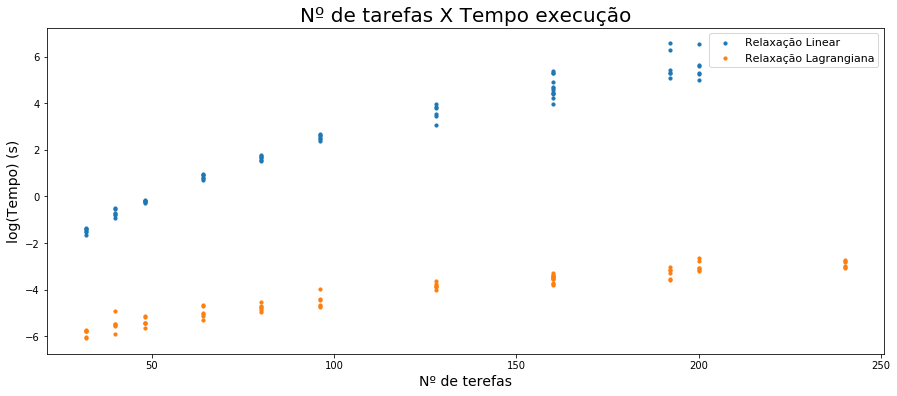

In [167]:
import matplotlib.pyplot as plt
import numpy as np

fig, axs = plt.subplots(1,1, figsize=(15,6))

lp_graph = lp.reset_index()
lp_graph['n'] = lp_graph['N'] + lp_graph['M']
lp_graph = lp_graph[['Time', 'n']]

n, time = lp_graph['n'], lp_graph['Time'].values
axs.scatter(n, np.log(time), label="Relaxação Linear", s=10)

lr_graph = lr.reset_index()
lr_graph['n'] = lr_graph['N'] + lr_graph['M']
lr_graph = lr_graph[['Time', 'n']] 

n, time = lr_graph['n'], lr_graph['Time'].values
axs.scatter(n, np.log(time), label="Relaxação Lagrangiana", s=10)

axs.set_xlabel("Nº de terefas", fontsize=14)
axs.set_ylabel("log(Tempo) (s)", fontsize=14)
axs.legend(fontsize=11)
axs.set_title("Nº de tarefas X Tempo execução", fontsize=20)

plt.savefig("imgs/meanTime.png")

In [143]:
lp_graph = lp.reset_index()
lp_graph['n'] = lp_graph['N'] + lp_graph['M']
lp_graph = lp_graph[['Time', 'n']]

lp_graph

,Time,n
0,0.192121,32
1,0.247809,32
2,0.246652,32
3,0.224723,32
4,0.262246,32
...,...,...
61,681.604223,200
62,263.841066,200
63,286.485149,200
64,146.547256,200
